In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
length = 100
network = np.zeros((length, length))  # 2D lattice
color = np.zeros((length, length))
network[:, 0] = 1  # Setting one for value of all nodes on the left
probability = 0.8

In [ ]:
def coloring():
    number = 2
    for i in range(1, length):
        for j in range(1, length):
            if random.random() < probability:
                # if the node is on, check up and left neighbor
                up = network[j, i - 1]
                left = network[j - 1, i]
                if up == 0 and left == 0:
                    # if neighbors are off, the new value set for the node
                    network[j, i] = number
                    number += 1
                    # if one of the neighbors is non-zero, its value set to the node
                elif up != 0 and left == 0:
                    network[j, i] = up
                elif up == 0 and left != 0:
                    network[j, i] = left
                else:
                    # if the two neighbors are non-zero, the minimum set to the node
                    # all nodes with another value, get this value
                    min_number = min(up, left)
                    network[j, i] = min_number
                    mask_number1 = (network == up)
                    mask_number2 = (network == left)
                    final = mask_number1 | mask_number2
                    network[final] = min_number
    # if number one exists in the last column, return 1, meaning the percolation exists.
    return network, int(1 in network[:, -1])


my_network, Q = coloring()
print(Q)
plt.imshow(my_network)
plt.show()
#first graph is an unsuccessful percolation with the probability of being on equals to 0.4.
#second graph is a successful percolation with the probability of being on equals to 0.8. due to the high probability we can see a lot of way from start to end.

In [ ]:

![0.PNG](attachment:0.PNG)
![1.PNG](attachment:1.PNG)

In [4]:
# initial values
length = np.array([10, 100, 200])
probability = np.arange(0, 1, 0.05)
iteration = 100
experiments = np.zeros((len(length), len(probability), iteration))
probability_Q = np.zeros((len(length), len(probability), iteration))

In [5]:
def Hoshen_Kopelman(length, prob):
    network = np.zeros((length, length), dtype=int)
    network[:, 0] = 1
    l = np.zeros(length * length, dtype=int)
    s = np.zeros(length * length, dtype=int)
    l[1] = 1
    s[l[1]] = length
    number = 2
    for j in range(1, length):
        for i in range(1, length):
            if np.random.random() < prob:
                left = network[i, j - 1]
                up = network[i - 1, j]
                if left == 0 and up == 0:
                    network[i, j] = number
                    l[number] = number
                    s[l[number]] += 1
                    number += 1

                elif left != 0 and up == 0:
                    network[i, j] = left
                    s[l[left]] += 1
                elif up != 0 and left == 0:
                    network[i, j] = up
                    s[l[up]] += 1

                elif l[up] == l[left]:
                    network[i, j] = left
                    s[l[left]] += 1
                else:
                    network[i, j] = left
                    s[l[left]] = (s[l[left]] + s[l[up]] + 1)
                    s[l[up]] = 0
                    l[l == l[up]] = l[left]

    return int(l[1] in l[network[:, length-1]]), l, s


10
100
200


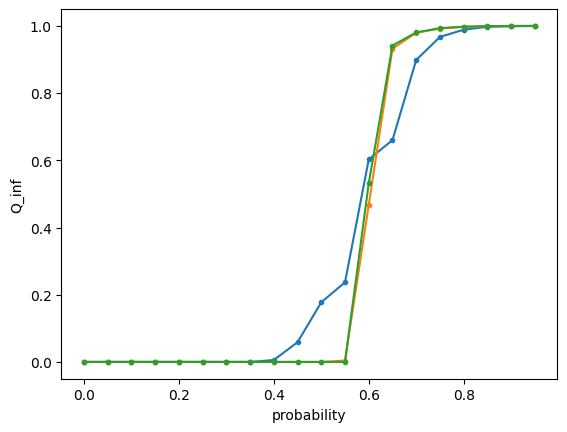

In [6]:
# using Hoshen_kopelman algorithm for analysis probability of percolation
for i in range(len(length)):
    print(length[i])
    for k in range(len(probability)):
        for j in range(iteration):
            q, l, s = Hoshen_Kopelman(length[i], probability[k])
            experiments[i, k, j] = q
            if q == 1:
                probability_Q[i, k, j] = (s[l[1]] - length[i]) / (np.sum(s) - length[i])

acc = np.mean(experiments, axis=2)
acc2 = np.mean(probability_Q, axis=2)
for i in range(len(length)):
    plt.plot(probability, acc2[i], '.-',label=f"L = {acc2[i]}")
plt.xlabel('probability')
plt.ylabel('Q_inf')
plt.show()

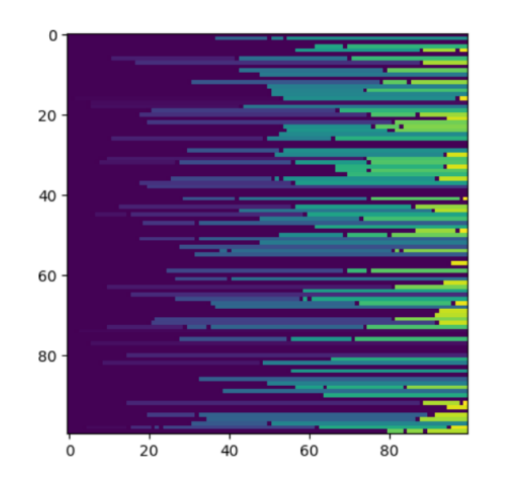